What is the nature of power?

True power is the ability to create. To build peace and unity from chaos, to liberate the beautiful and true from the cluttered and broken. To make enjoyment possible where confusion or fear held things back.

Some seek power through destruction and intimidation, but that leaves the world diminished. Anyone can destroy something beautiful, or true. It doesn't take any special talent to burn a book or smash a clock.

The power to elate, enliven, and elevate -- the power to add without detracting, to support without demeaning -- that adds to life. It's the essence of photosynthesis, of natural philosophy, and of love. True power is to create beauty from disorder, to share without becoming lessened, and to stimulate the natural creative potential in what it touches.

Honest, clean power is a not like a hammer, but like a star.


In [43]:
%matplotlib inline
from random import gauss, seed, randrange
import random
import multiprocessing as mp
from os import cpu_count
import json

import pandas as pd
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import clear_output

In [ ]:
env = gym.make("Taxi-v3").env
env.render()

# Here we can determine the size of the state space:
# 5x5 locations on the grid indicate locations
# 4 locations (r,g,y,b -> 0,1,2,3) can be the start and end points of the taxi's journey
# 4 + 1 passenger locations (r,g,y,b plus inside the taxi)
# Therefore the total state space,
# indicating location plus the extra bit indicating endpoints, yields
# 5x5x4x(4+1) = 500 possible states

In [ ]:
#env = gym.make("MountainCarContinuous-v0").env
#env.render()

In [ ]:
# The action space is smaller.
# It consists of motions in cardinal directions and one other kind of action:
# north, south, east, west, pickup, dropoff


### For conversational corpora,
### the action space is the known vocabulary.
### The state space is the product space of the words in the sequence to be completed.


# The reward paradigm is simple:
# A successful dropoff earns 20 points
# Every time-step costs 1 point from the accumulated rewards (i.e. faster is better)
# an illegal pickup or dropoff costs 10 points.

In [ ]:
env.reset()
env.render()
# shows the same environment, but with a fresh starting setup.
# The passenger's location (pickup location) is the BLUE letter.
# The destination is the PINK letter.

In [ ]:
# The State space can be represented by a unique number for each value (0-499)
# The Action space can be represented by a unique number (0-5)


# in the following encoding schema, 
# the first two numbers are the row and column of the taxi's location
# the passenger's location (BLUE) is the third digit, and
# the destination (PINK) is the fourth
state_0 = env.encode(3,1,2,0)
print("State: " + str(state_0))
env.s = state_0
env.render()

In [ ]:
# The reward table: shows the payoffs for each possible Action (0-5), given a State
# Also indicates whether or not the simulation is "done"

env.P[328]

In [ ]:
# Coding the parameters

# alpha is the learning rate: 0 < alpha =< 1
# It's the proportion by which Q-values are updated in each iteration
alpha = .001

# gamma is the discount rate: 0 < gamma =< 1
# it controls the importance given to future rewards vs immediate rewards
# high gamma captures long-term rewards, while
# low gamma emphasizes immediate rewards (greedy algorithm)
gamma = .001


In [ ]:


## Functions to apply modifiers to hyperparameters and reward scheme
## technically these are ... part of the metaenvironment?






def generate_reward_mods():
    pass


def update_hparam(hparam, slope):
    new_value = hparam + slope
    return new_value



def modified_reward(reward, modifier_series, epoch_index):
    modified_reward = reward*modifier_series[i]
    return modified_reward



In [ ]:
%%time
# Based on code from https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/




"""Training the agent"""

# the present reward is determined by the State Table




# Hyperparameters


def static_alpha():
    alpha = randrange(1.0, 25.0, 1.0)/100
    return alpha

def static_epsilon():
    epsilon = randrange(1.0, 20.0, 1.0)/100
    return epsilon

def static_gamma():
    gamma = randrange(50.0, 99.0, 1.0)/100
    return gamma



# environmental reward modifiers

def make_chaos_level():
    chaos_level = randrange(start=0.0, stop=100.0, step=1.0)/100
    return chaos_level


def chaos_mod(chaos_level):
    if (random.uniform(0,1) < chaos_level):
        mod = gauss(0.0, chaos_level)
    else:
        mod = 0
    return mod


def calculate_reward(base_reward, chaos_level):
    percent_diff = chaos_mod(chaos_level)
    adjusted_reward = base_reward*(1+percent_diff)
    return adjusted_reward


def update_running_average(counter_list, averages_list, value):
    if (len(counter_list) < 1000):
        average = sum(counter_list)/len(counter_list)
    else:
        average = sum(counter_list[-1000:])/len(counter_list[-1000:])
    averages_list.append(average)
    return




def train_static_learner(chaos=True):
    
    epoch_count = 100000
    
    alpha = static_alpha()
    gamma = static_gamma()
    epsilon = static_epsilon()
    
    env = gym.make("Taxi-v3").env
    
    #Initialize Q table
    q_table = np.zeros([env.observation_space.n, env.action_space.n])

    
    
    if chaos:
        chaos_level = make_chaos_level()
    else:
        chaos_level = 0.0
        
    
    # For plotting metrics
    all_epoch_step_counts = []
    all_base_reward_totals = []
    all_custom_reward_totals = []
    all_penalty_counts = []
    
    running_average_step_counts = []
    running_average_base_rewards = []
    running_average_custom_rewards = []
    running_average_penalty_counts = []
    
    
    metadata = {
        "initial_alpha": alpha,
        "final_alpha": alpha,
        "alpha_slope": 0.0,
        "initial_epsilon": epsilon,
        "final_epsilon": epsilon,
        "epsilon_slope": 0.0,
        "initial_gamma": gamma,
        "final_gamma": gamma,
        "gamma_slope": 0.0,
        "chaos_level": chaos_level,
        "all_epoch_step_counts": all_epoch_step_counts,
        "all_base_reward_totals": all_base_reward_totals,
        "all_custom_reward_totals": all_custom_reward_totals,
        "all_epoch_step_counts": all_epoch_step_counts,
        "all_penalty_counts": all_penalty_counts,
        "running_average_penalty_counts": running_average_penalty_counts,
        "running_average_base_rewards": running_average_base_rewards,
        "running_average_custom_rewards": running_average_custom_rewards,
        "running_average_step_counts": running_average_step_counts
    }
    
    
    
    for i in range(1, (epoch_count + 1)):
        state = env.reset()

        epochs, penalties, reward = 0, 0, 0
        
        step_count = 0
        net_base_reward = 0
        net_custom_reward = 0
        
        
        done = False

        while not done:
            
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action)
            

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            custom_reward = calculate_reward(reward, chaos_level)
            
            new_value = (1 - alpha) * old_value + alpha * (custom_reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1
                
            #pdb.set_trace()
            
            net_base_reward += reward
            net_custom_reward += custom_reward
            step_count += 1
            
            
        # update params and hparams for next epoch
        state = next_state
        epochs += 1
        
        all_base_reward_totals.append(net_base_reward)
        all_custom_reward_totals.append(net_custom_reward)
        all_epoch_step_counts.append(step_count)
        all_penalty_counts.append(penalties)
        
        update_running_average(all_base_reward_totals, running_average_base_rewards, net_base_reward)
        update_running_average(all_custom_reward_totals, running_average_custom_rewards, net_custom_reward)
        update_running_average(all_epoch_step_counts, running_average_step_counts, step_count)
        update_running_average(all_penalty_counts, running_average_penalty_counts, penalties)

        if i % 100 == 0:
            clear_output(wait=True)
            #print(f"Episode: {i}")

    #print("Training finished.\n")
    return metadata

    
    
from datetime import datetime as dt
start = dt.now()
#metadata = train_static_learner()
train_static_learner()
end = dt.now()
print(end-start)

In [39]:
metadata

NameError: name 'metadata' is not defined

In [ ]:
import json

json.loads(json.dumps(metadata))

In [ ]:
%%time

static_learners_no_chaos = [train_static_learner(chaos=False) for i in range(10)]

In [ ]:
%%time

pdb.set_trace()
static_learners_with_chaos = [train_static_learner(chaos=True) for i in range(10)]

In [ ]:
plt.scatter(range(50000), metadata["all_epoch_step_counts"])
plt.show()

plt.scatter(range(50000), metadata["all_penalty_counts"])
plt.show()

plt.scatter(range(50000), metadata["all_base_reward_totals"])
plt.show()

plt.scatter(range(50000), metadata["all_custom_reward_totals"])
plt.show()

In [ ]:
#%%time

def evaluate_performance():
    total_epochs, total_penalties = 0, 0
    episodes = 100

    for _ in range(episodes):
        state = env.reset()
        epochs, penalties, reward = 0, 0, 0

        done = False

        while not done:
            action = np.argmax(q_table[state])
            state, reward, done, info = env.step(action)

            if reward == -10:
                penalties += 1

            epochs += 1

        total_penalties += penalties
        total_epochs += epochs

    print(f"Results after {episodes} episodes:")
    print(f"Average timesteps per episode: {total_epochs / episodes}")
    print(f"Average penalties per episode: {total_penalties / episodes}")
    
evaluate_performance()

In [ ]:
%%time

from math import log, sqrt





# learner hyperparameters

def linear_epsilon(epoch_count=100):
    initial_epsilon = randrange(5.0, 20.0, 1.0)/100
    final_epsilon = randrange(1.0, 5.0, 1.0)/100
    if (final_epsilon > initial_epsilon):
        initial_epsilon, final_epsilon = final_epsilon, initial_epsilon
    epsilon_slope = (final_epsilon-initial_epsilon)/epoch_count
    return initial_epsilon, final_epsilon, epsilon_slope


def linear_alpha(epoch_count=100):
    initial_alpha = randrange(1.0, 25.0, 1.0)/100
    final_alpha = randrange(1.0, 25.0, 1.0)/100
    if (final_alpha > initial_alpha):
        initial_alpha, final_alpha = final_alpha, initial_alpha
    alpha_slope = (final_alpha-initial_alpha)/epoch_count
    return initial_alpha, final_alpha, alpha_slope


def linear_gamma(epoch_count=100):
    initial_gamma = randrange(50.0, 99.0, 1.0)/100
    final_gamma = randrange(50.0, 99.0, 1.0)/100
    if (final_gamma > initial_gamma):
        initial_gamma, final_gamma = final_gamma, initial_gamma
    gamma_slope = (final_gamma-initial_gamma)/epoch_count
    return initial_gamma, final_gamma, gamma_slope






"""
def richness_mod():
    richness_log = (randrange(start=0.0, stop=200.0, step=1.0)/100) - 0.99
    richness_factor = 3**richness_log
    return richness_factor

def subjective_negative_mod():
    mod = randrange(start = 1.0, stop = 8.0, step=0.1)
    return mod

def calculate_modified_reward(base_reward, richness, chaos, subjective_neg_mod):
    post_chaos_reward = base_reward*chaos_mod(chaos_level)
    
    if (post_chaos_reward > 0):
        adjusted_reward = base_reward*richness
    else:
        adjusted_reward = base_reward*subjective_neg_mod
    pass
"""




def train_linear_learner():
    
    epoch_count = 60000
    
    epsilon, final_epsilon, epsilon_slope = linear_epsilon(epoch_count)
    alpha, final_alpha, alpha_slope = linear_alpha(epoch_count)
    gamma, final_gamma, gamma_slope = linear_gamma(epoch_count)
    
    chaos_level = make_chaos_level()
    
    
    # For plotting metrics
    # these are downsampled to just every 25th epoch
    epoch_step_counts = []
    base_reward_totals = []
    custom_reward_totals = []
    penalty_counts = []
    
    
    metadata = {
        "initial_alpha": alpha,
        "final_alpha": final_alpha,
        "alpha_slope": alpha_slope,
        "initial_epsilon": epsilon,
        "final_epsilon": final_epsilon,
        "epsilon_slope": epsilon_slope,
        "initial_gamma": gamma,
        "final_gamma": final_gamma,
        "gamma_slope": gamma_slope,
        "chaos_level": chaos_level,
        "epoch_step_counts": epoch_step_counts,
        "base_reward_totals": base_reward_totals,
        "custom_reward_totals": custom_reward_totals,
        "epoch_step_counts": epoch_step_counts,
        "penalty_counts": penalty_counts
    }
    
    
    for i in range(1, (epoch_count + 1)):
        state = env.reset()

        epochs, penalties, reward = 0, 0, 0
        
        step_count = 0
        net_base_reward = 0
        net_custom_reward = 0
        
        done = False

        while not done:
            
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 
            
            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            
            
            custom_reward = calculate_reward(reward, chaos_level)
            
            new_value = (1 - alpha) * old_value + alpha * (custom_reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1
                
            net_base_reward += reward
            net_custom_reward += custom_reward
            step_count += 1
                
        # update params an hparams for next epoch
        state = next_state
        epochs += 1

        alpha += alpha_slope
        epsilon += epsilon_slope
        gamma += gamma_slope


        base_reward_totals.append(net_base_reward)
        custom_reward_totals.append(net_custom_reward)
        epoch_step_counts.append(step_count)
        penalty_counts.append(penalties)


        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.\n")

from datetime import datetime as dt
start = dt.now()
train_linear_learner()
end = dt.now()
print(end-start)

In [ ]:
%%time


def alpha_reward_differential():
    pass

def gamma_reward_differential():
    pass

def epsilon_reward_differential():
    pass


def alpha_penalty_differential():
    pass

def gamma_penalty_differential():
    pass

def epsilon_penalty_differential():
    pass


def dynamic_alpha():
    pass

def dynamic_gamma():
    pass

def dynamic_epsilon():
    pass




def train_dynamic_learner():
    
    epoch_count = 100000
    
    
    
    for i in range(1, (epoch_count + 1)):
        state = env.reset()

        epochs, penalties, reward, = 0, 0, 0
        done = False

        while not done:
            
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action) 

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            
            custom_reward = calculate_reward(reward, chaos_level)

            new_value = (1 - alpha) * old_value + alpha * (custom_reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1

        state = next_state
        epochs += 1

        if i % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.\n")

    


In [ ]:
fro3600/33

In [56]:
from random import gauss, seed, randrange
import random
import multiprocessing as mp
from os import cpu_count
import json

import pandas as pd
import gym
import numpy as np
from datetime import datetime

from IPython.display import clear_output
import pdb


# Based on code from https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/


"""Training the agent"""


# learner hyperparameters

def linear_epsilon(epoch_count):
    initial_epsilon = randrange(5.0, 20.0, 1.0)/100
    final_epsilon = randrange(1.0, 5.0, 1.0)/100
    if (final_epsilon > initial_epsilon):
        initial_epsilon, final_epsilon = final_epsilon, initial_epsilon
    div = (epoch_count/1000)
    epsilon_slope = (final_epsilon-initial_epsilon)/epoch_count
    return initial_epsilon, final_epsilon, epsilon_slope


def linear_alpha(epoch_count):
    initial_alpha = randrange(1.0, 25.0, 1.0)/100
    final_alpha = randrange(1.0, 25.0, 1.0)/100
    if (final_alpha > initial_alpha):
        initial_alpha, final_alpha = final_alpha, initial_alpha
    div = (epoch_count/1000)
    alpha_slope = (final_alpha-initial_alpha)/epoch_count
    return initial_alpha, final_alpha, alpha_slope


def linear_gamma(epoch_count):
    initial_gamma = randrange(50.0, 99.0, 1.0)/100
    final_gamma = randrange(50.0, 99.0, 1.0)/100
    if (final_gamma > initial_gamma):
        initial_gamma, final_gamma = final_gamma, initial_gamma
    div = (epoch_count/1000)
    gamma_slope = (final_gamma-initial_gamma)/epoch_count
    return initial_gamma, final_gamma, gamma_slope




# environmental reward modifiers

def make_chaos_level():
    chaos_level = randrange(start=0.0, stop=100.0, step=1.0)/100
    return chaos_level


def chaos_mod(chaos_level):
    if (random.uniform(0,1) < chaos_level):
        mod = gauss(0.0, chaos_level)
    else:
        mod = 0
    return mod


def calculate_reward(base_reward, chaos_level):
    percent_diff = chaos_mod(chaos_level)
    adjusted_reward = base_reward*(1+percent_diff)
    return adjusted_reward


def update_running_average(counter_list, averages_list, value):
    if (len(counter_list) < 1000):
        average = sum(counter_list)/len(counter_list)
    else:
        average = sum(counter_list[-1000:])/len(counter_list[-1000:])
    averages_list.append(average)
    return



def train_linear_learner(chaos=True):
    
    epoch_count = 60000
    
    env = gym.make("Taxi-v3").env
    
    #Initialize Q table
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
        
    epsilon, final_epsilon, epsilon_slope = linear_epsilon(epoch_count)
    alpha, final_alpha, alpha_slope = linear_alpha(epoch_count)
    gamma, final_gamma, gamma_slope = linear_gamma(epoch_count)
    
    print(alpha, final_alpha, alpha_slope)
    print(epsilon, final_epsilon, epsilon_slope)
    print(gamma, final_gamma, gamma_slope)
    
    if chaos:
        chaos_level = make_chaos_level()
    else:
        chaos_level = 0.0
    
    
    # For plotting metrics
    # these are downsampled to just every 25th epoch
    epoch_step_counts = []
    base_reward_totals = []
    custom_reward_totals = []
    penalty_counts = []
    
    
    metadata = {
        "initial_alpha": alpha,
        "final_alpha": final_alpha,
        "alpha_slope": alpha_slope,
        "initial_epsilon": epsilon,
        "final_epsilon": final_epsilon,
        "epsilon_slope": epsilon_slope,
        "initial_gamma": gamma,
        "final_gamma": final_gamma,
        "gamma_slope": gamma_slope,
        "chaos_level": chaos_level,
        "epoch_step_counts": epoch_step_counts,
        "base_reward_totals": base_reward_totals,
        "custom_reward_totals": custom_reward_totals,
        "penalty_counts": penalty_counts,
        "q_table": q_table
        }
    
    
    
    for i in range(1, (epoch_count + 1)):
        state = env.reset()

        epochs, penalties, reward = 0, 0, 0
        
        step_count = 0
        net_base_reward = 0
        net_custom_reward = 0
        
        
        done = False

        while not done:
            
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action)
            

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            
            #pdb.set_trace()

            custom_reward = calculate_reward(reward, chaos_level)
            #pdb.set_trace()

            new_value = (1 - alpha) * old_value + alpha * (custom_reward + gamma * next_max)
            #pdb.set_trace()
            q_table[state, action] = new_value

            #pdb.set_trace()

            if reward == -10:
                penalties += 1

            net_base_reward += reward
            net_custom_reward += custom_reward
            step_count += 1
            
        
            state = next_state
            
            
        # update params and hparams for next epoch
        #if i % 25 == 0:            
        base_reward_totals.append(net_base_reward)
        custom_reward_totals.append(net_custom_reward)
        epoch_step_counts.append(step_count)
        penalty_counts.append(penalties)


        if i%1000 == 0:
            alpha += alpha_slope
            epsilon += epsilon_slope
            gamma += gamma_slope
            clear_output(wait=True)
            print(f"Episode: {i}")

        #if i%10000 == 0:
            #print(alpha, final_alpha, alpha_slope)
            #print(epsilon, final_epsilon, epsilon_slope)
            #print(gamma, final_gamma, gamma_slope)
            
            
    print(alpha, final_alpha, alpha_slope)
    print(epsilon, final_epsilon, epsilon_slope)
    print(gamma, final_gamma, gamma_slope)
    print(len(base_reward_totals))

    #print("Training finished.\n")
    return metadata


    
def linear_sim_no_chaos():
    result = train_linear_learner(chaos=False)
    filename = "./simulation_data/linear_learners_no_chaos.json"
    return result, filename


def linear_sim_with_chaos():
    result = train_linear_learner(chaos=True)
    filename = "./simulation_data/linear_learners_with_chaos.json"
    return result, filename

from datetime import datetime as dt
print(dt.now())

2021-12-25 02:04:41.153698


In [34]:
from datetime import datetime as dt
start = dt.now()
print("Start: " + str(start))
linear_no_chaos = linear_sim_no_chaos()
end = dt.now()
print(end-start)

Episode: 60000
0.1900000000000005 0.19 -0.0008333333333333332
0.029999999999999916 0.03 -0.0006666666666666668
0.7500000000000009 0.75 -0.0031666666666666657
60000
0:00:20.136456


In [57]:
from datetime import datetime as dt
start = dt.now()
print("Start: " + str(start))
linear_with_chaos, name = linear_sim_with_chaos()
end = dt.now()
print(end-start)


Episode: 60000
0.10993999999999994 0.05 -1e-06
0.10990000000000018 0.01 -1.6666666666666667e-06
0.8099700000000025 0.78 -5.000000000000004e-07
60000
0:00:26.448199


In [26]:

from random import gauss, seed, randrange
import random
import multiprocessing as mp
from os import cpu_count
import json

import pandas as pd
import gym
import numpy as np
from datetime import datetime


# Based on code from https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/



# Hyperparameters

def static_alpha():
    alpha = randrange(1.0, 25.0, 1.0)/100
    return alpha

def static_epsilon():
    epsilon = randrange(1.0, 20.0, 1.0)/100
    return epsilon

def static_gamma():
    gamma = randrange(50.0, 99.0, 1.0)/100
    return gamma



# environmental reward modifiers

def make_chaos_level():
    chaos_level = randrange(start=0.0, stop=100.0, step=1.0)/100
    return chaos_level


def chaos_mod(chaos_level):
    if (random.uniform(0,1) < chaos_level):
        mod = gauss(0.0, chaos_level)
    else:
        mod = 0
    return mod


def calculate_reward(base_reward, chaos_level):
    percent_diff = chaos_mod(chaos_level)
    adjusted_reward = base_reward*(1+percent_diff)
    return adjusted_reward


# update functions

def update_running_average(counter_list, averages_list, value):
    if (len(counter_list) < 1000):
        average = sum(counter_list)/len(counter_list)
    else:
        average = sum(counter_list[-1000:])/len(counter_list[-1000:])
    averages_list.append(average)
    return



def train_static_learner(chaos=True):
    
    epoch_count = 60000
    
    env = gym.make("Taxi-v3").env
    
    #Initialize Q table
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    
    
    alpha = static_alpha()
    gamma = static_gamma()
    epsilon = static_epsilon()
    
    
    if chaos:
        chaos_level = make_chaos_level()
    else:
        chaos_level = 0.0
        
    
    # For plotting metrics
    epoch_step_counts = []
    base_reward_totals = []
    custom_reward_totals = []
    penalty_counts = []
    
    #running_average_step_counts = []
    #running_average_base_rewards = []
    #running_average_custom_rewards = []
    #running_average_penalty_counts = []
    
    
    metadata = {
        "initial_alpha": alpha,
        "final_alpha": alpha,
        "alpha_slope": 0.0,
        "initial_epsilon": epsilon,
        "final_epsilon": epsilon,
        "epsilon_slope": 0.0,
        "initial_gamma": gamma,
        "final_gamma": gamma,
        "gamma_slope": 0.0,
        "chaos_level": chaos_level,
        "base_reward_totals": base_reward_totals,
        "custom_reward_totals": custom_reward_totals,
        "epoch_step_counts": epoch_step_counts,
        "penalty_counts": penalty_counts,
        #"running_average_penalty_counts": running_average_penalty_counts,
        #"running_average_base_rewards": running_average_base_rewards,
        #"running_average_custom_rewards": running_average_custom_rewards,
        #"running_average_step_counts": running_average_step_counts
    }
    
    
    
    for i in range(1, (epoch_count + 1)):
        state = env.reset()

        epochs, penalties, reward = 0, 0, 0
        
        step_count = 0
        net_base_reward = 0
        net_custom_reward = 0
        
        
        done = False

        while not done:
         
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values

            next_state, reward, done, info = env.step(action)
            
            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            custom_reward = calculate_reward(reward, chaos_level)
            
            new_value = (1 - alpha) * old_value + alpha * (custom_reward + gamma * next_max)
            q_table[state, action] = new_value

            if reward == -10:
                penalties += 1
                
            net_base_reward += reward
            net_custom_reward += custom_reward
            step_count += 1
            
            state = next_state
            
        # update stats for epoch
        base_reward_totals.append(net_base_reward)
        custom_reward_totals.append(net_custom_reward)
        epoch_step_counts.append(step_count)
        penalty_counts.append(penalties)

        #update_running_average(base_reward_totals, running_average_base_rewards, net_base_reward)
        #update_running_average(custom_reward_totals, running_average_custom_rewards, net_custom_reward)
        #update_running_average(epoch_step_counts, running_average_step_counts, step_count)
        #update_running_average(penalty_counts, running_average_penalty_counts, penalties)
        
        # update params and hparams for next epoch
        
    #print("Training finished.\n")
    return metadata


    
def static_sim_no_chaos():
    result = train_static_learner(chaos=True)
    filename = "./simulation_data/static_learners_no_chaos_BETTER.json"
    return result, filename


def static_sim_with_chaos():
    result = train_static_learner(chaos=False)
    filename = "./simulation_data/static_learners_with_chaos_BETTER.json"
    return result, filename

In [28]:
from datetime import datetime as dt
start = dt.now()
print("Start: " + str(start))
static_with_chaos = static_sim_with_chaos()
end = dt.now()
print(end-start)

Start: 2021-12-25 00:31:22.387151
0:00:15.455817


In [51]:
meta, filename = static_with_chaos

len(meta["epoch_step_counts"])

60000

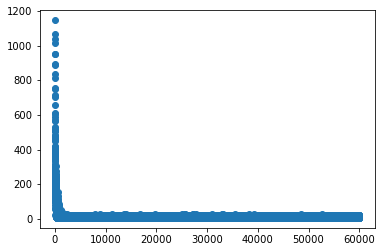

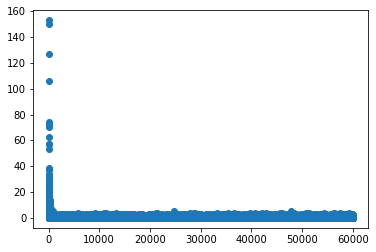

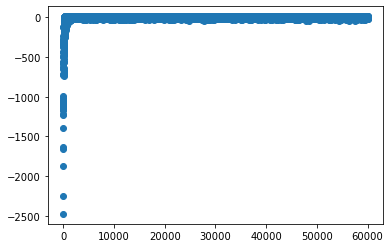

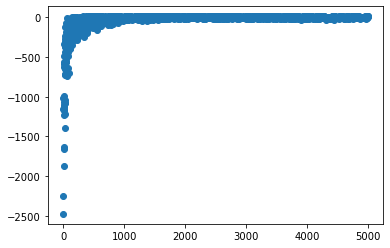

In [55]:
plt.scatter(range(60000), static_with_chaos[0]["epoch_step_counts"])
plt.show()

plt.scatter(range(60000), static_with_chaos[0]["penalty_counts"])
plt.show()

plt.scatter(range(60000), static_with_chaos[0]["base_reward_totals"])
plt.show()

plt.scatter(range(5000), static_with_chaos[0]["custom_reward_totals"][0:5000])
plt.show()

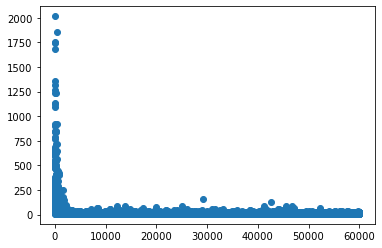

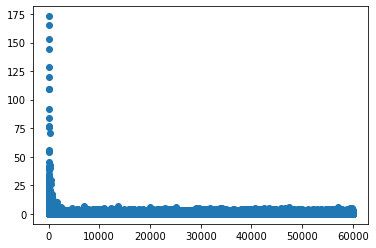

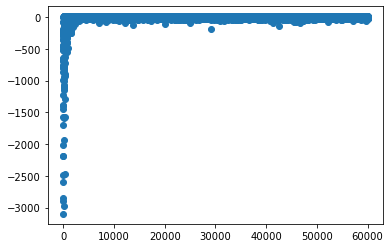

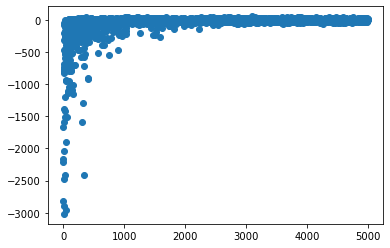

In [58]:
plt.scatter(range(60000), linear_with_chaos["epoch_step_counts"])
plt.show()

plt.scatter(range(60000), linear_with_chaos["penalty_counts"])
plt.show()

plt.scatter(range(60000), linear_with_chaos["base_reward_totals"])
plt.show()

plt.scatter(range(5000), linear_with_chaos["custom_reward_totals"][0:5000])
plt.show()